In [22]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - PES2UG23CS350

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [23]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [ ]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.
    
    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    # Load CSV with correct separator
    df = pd.read_csv(filepath, sep=';')
    
    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']
    
    # Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col].astype(str))
    
    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
               'housing', 'loan', 'default']
    X = df[features]
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

Data shape: (45211, 9)


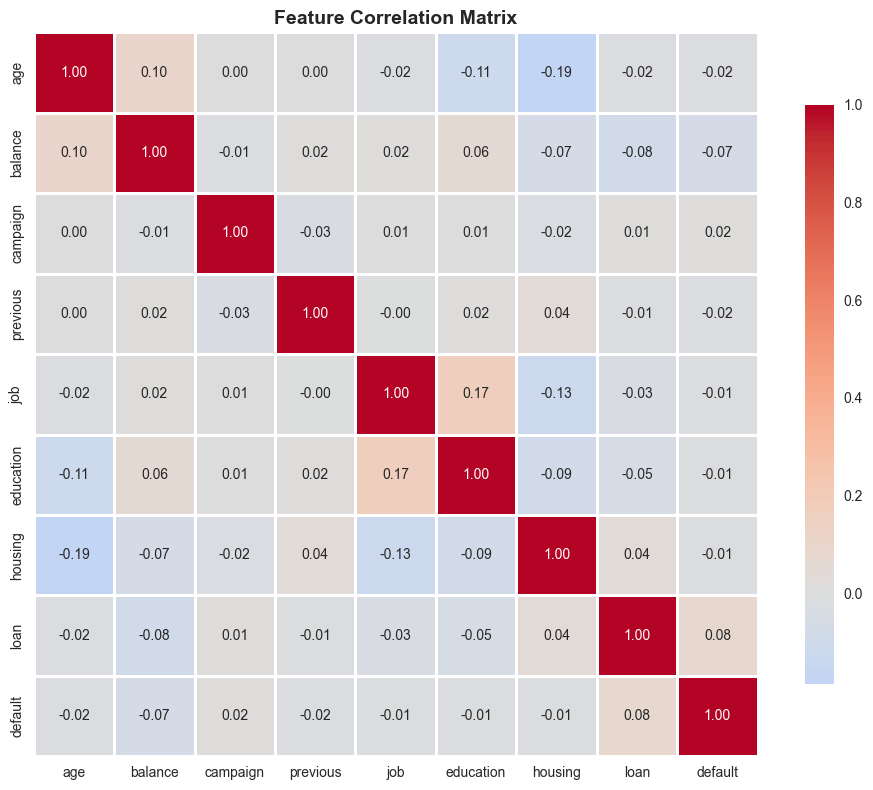

In [25]:
# Visualize Feature Correlations
features_for_corr = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
                     'housing', 'loan', 'default']
df_features = data[features_for_corr]

# Calculate correlation matrix
correlation_matrix = df_features.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [26]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        np.random.seed(random_state)

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        # Randomly select n_clusters data points as initial centroids
        n_samples = X.shape[0]
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        centroids = X[random_indices]
        return centroids

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        # Calculate distances from each point to each centroid
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        
        # Assign each point to the nearest centroid
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        
        for i in range(self.n_clusters):
            # Get points assigned to cluster i
            cluster_points = X[labels == i]
            
            if len(cluster_points) > 0:
                # Calculate mean of points in this cluster
                centroids[i] = cluster_points.mean(axis=0)
            else:
                # If cluster is empty, keep the old centroid or reinitialize
                centroids[i] = self.centroids[i]
        
        return centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        # Initialize centroids
        self.centroids = self._initialize_centroids(X)
        
        for iteration in range(self.max_iters):
            # Store old centroids for convergence check
            old_centroids = self.centroids.copy()
            
            # Assign clusters
            self.labels = self._assign_clusters(X)
            
            # Update centroids
            self.centroids = self._update_centroids(X, self.labels)
            
            # Check for convergence
            if np.allclose(old_centroids, self.centroids, rtol=1e-6):
                print(f"Converged at iteration {iteration + 1}")
                break
        
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

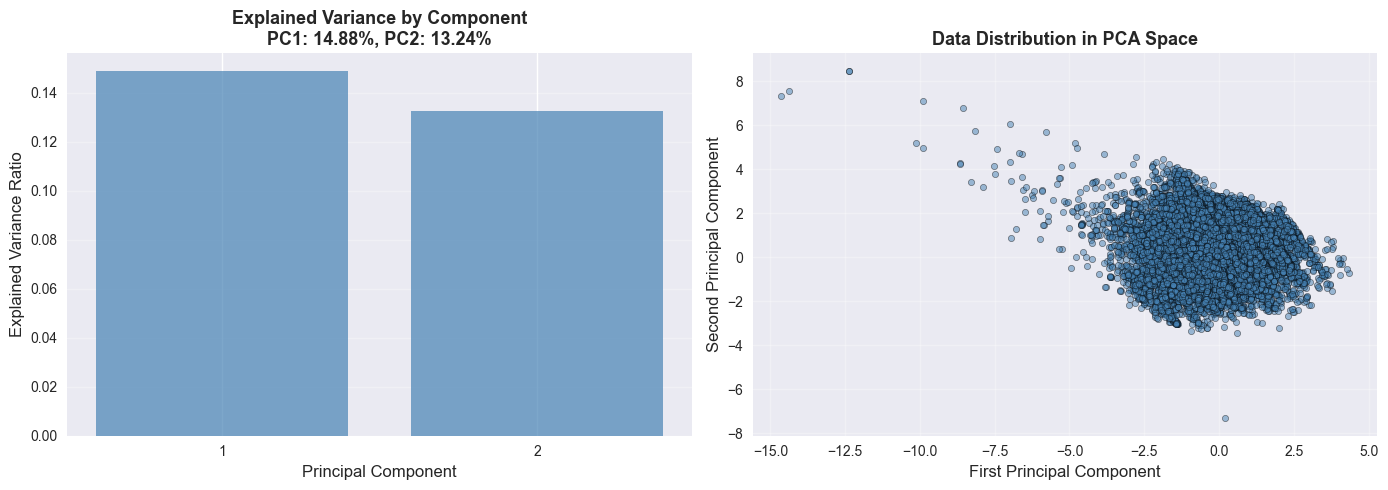


PCA Analysis:
Total variance explained by 2 components: 28.12%
Shape after PCA: (45211, 2)


In [27]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.
    
    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Create visualization
    plt.figure(figsize=(14, 5))
    
    # Plot 1: Explained variance by component
    plt.subplot(1, 2, 1)
    variance_ratio = pca.explained_variance_ratio_
    plt.bar(range(1, n_components + 1), variance_ratio, alpha=0.7, color='steelblue')
    plt.xlabel('Principal Component', fontsize=12)
    plt.ylabel('Explained Variance Ratio', fontsize=12)
    plt.title(f'Explained Variance by Component\nPC1: {variance_ratio[0]:.2%}, PC2: {variance_ratio[1]:.2%}', 
              fontsize=13, fontweight='bold')
    plt.xticks(range(1, n_components + 1))
    plt.grid(axis='y', alpha=0.3)
    
    # Plot 2: Data distribution in 2D PCA space
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=20, c='steelblue', edgecolors='k', linewidth=0.5)
    plt.xlabel('First Principal Component', fontsize=12)
    plt.ylabel('Second Principal Component', fontsize=12)
    plt.title('Data Distribution in PCA Space', fontsize=13, fontweight='bold')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nPCA Analysis:")
    print(f"Total variance explained by {n_components} components: {sum(variance_ratio):.2%}")
    
    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

Converged at iteration 32
Converged at iteration 27
Converged at iteration 27
Converged at iteration 25
Converged at iteration 25
Converged at iteration 34
Converged at iteration 34
Converged at iteration 24
Converged at iteration 24
Converged at iteration 99
Converged at iteration 99
Converged at iteration 35
Converged at iteration 35
Converged at iteration 70
Converged at iteration 70
Converged at iteration 69
Converged at iteration 69


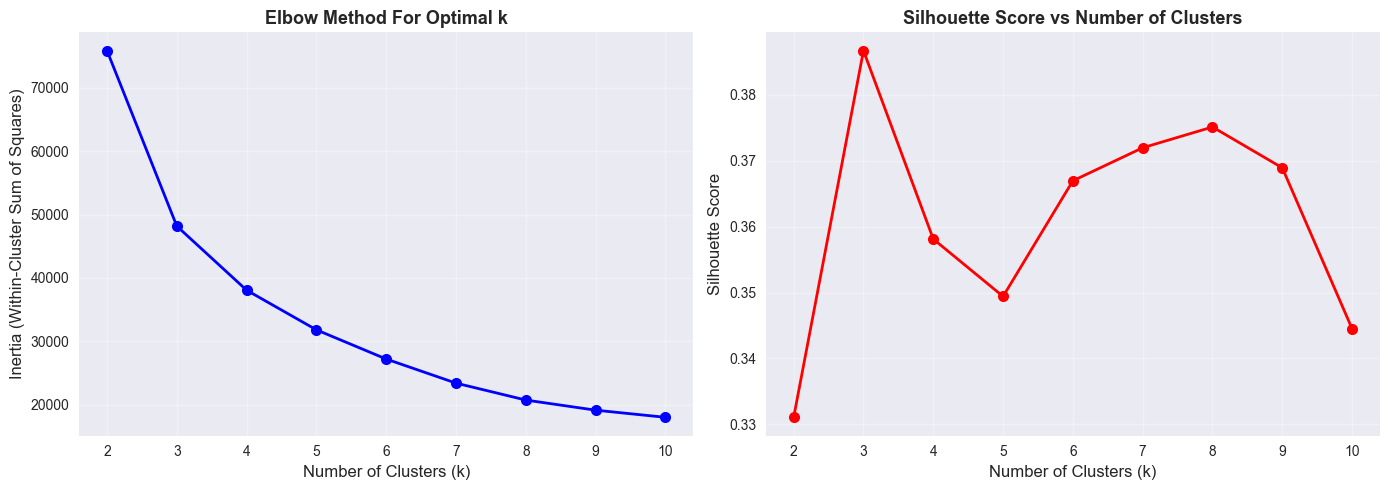

Converged at iteration 27


C:\Users\Mohit\AppData\Local\Temp\ipykernel_17444\3941893890.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(cluster_silhouette_data, labels=range(kmeans.n_clusters), patch_artist=True)


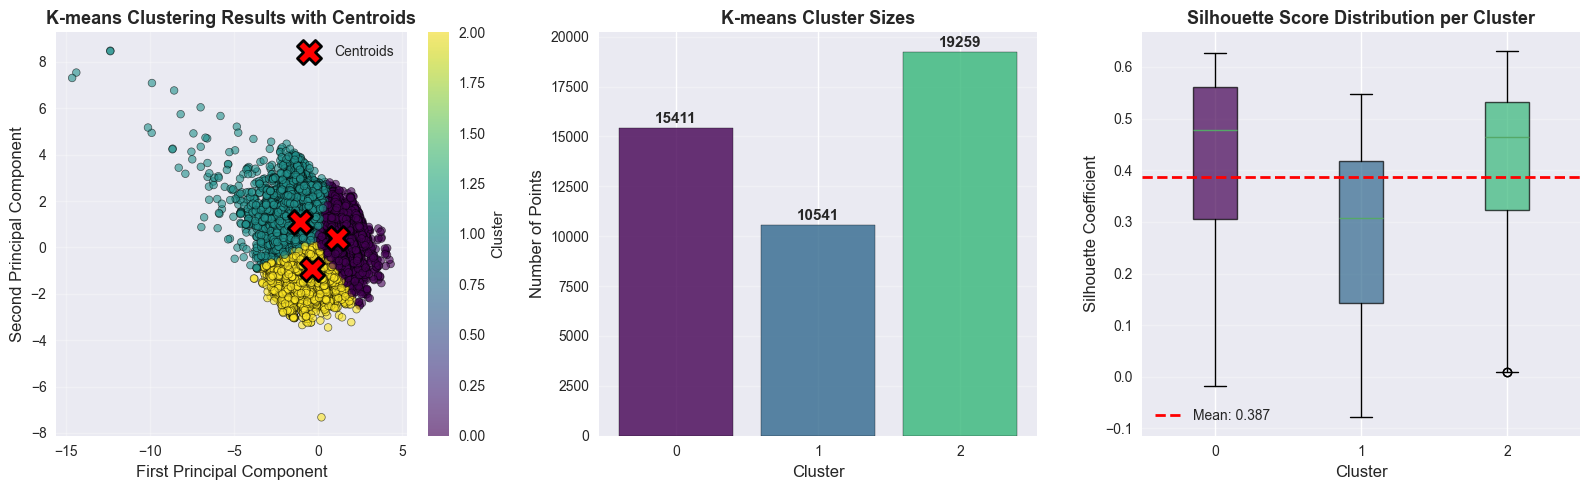


K-MEANS CLUSTERING EVALUATION
Number of Clusters: 3
Inertia: 48179.64
Silhouette Score: 0.3867

Cluster Distribution:
  Cluster 0: 15411 points (34.1%)
  Cluster 1: 10541 points (23.3%)
  Cluster 2: 19259 points (42.6%)


In [28]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).
    
    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    # Calculate distances between points and their assigned centroids
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            inertia += np.sum((cluster_points - centroids[i]) ** 2)
    
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.
    
    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    silhouette_scores = []
    K = range(2, max_k + 1)
    
    # Calculate inertia for different k values
    for k in K:
        kmeans = KMeansClustering(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
        inertias.append(inertia)
        
        # Calculate silhouette score (only for k >= 2)
        if k >= 2:
            sil_score = silhouette_score(X, kmeans.labels)
            silhouette_scores.append(sil_score)
    
    # Create elbow plot
    plt.figure(figsize=(14, 5))
    
    # Plot 1: Inertia (Elbow curve)
    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
    plt.title('Elbow Method For Optimal k', fontsize=13, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.xticks(K)
    
    # Plot 2: Silhouette scores
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'ro-', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)
    plt.title('Silhouette Score vs Number of Clusters', fontsize=13, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.xticks(K)
    
    plt.tight_layout()
    plt.show()
    
    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering with optimal k=3
kmeans = KMeansClustering(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(16, 5))

# Plot 1: Clusters with centroids
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, 
                     cmap='viridis', alpha=0.6, s=30, edgecolors='k', linewidth=0.5)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', marker='X', s=300, edgecolors='black', linewidth=2, 
            label='Centroids', zorder=5)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('K-means Clustering Results with Centroids', fontsize=13, fontweight='bold')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)

# Plot 2: Cluster sizes
plt.subplot(1, 3, 2)
unique, counts = np.unique(kmeans.labels, return_counts=True)
bars = plt.bar(unique, counts, color=['#440154', '#31688e', '#35b779'], alpha=0.8, edgecolor='black')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Points', fontsize=12)
plt.title('K-means Cluster Sizes', fontsize=13, fontweight='bold')
plt.xticks(unique)
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Plot 3: Silhouette analysis per cluster
plt.subplot(1, 3, 3)
silhouette_vals = []
for i in range(kmeans.n_clusters):
    cluster_points = X_pca[kmeans.labels == i]
    if len(cluster_points) > 1:
        cluster_silhouette = silhouette_score(X_pca, kmeans.labels)
    silhouette_vals.append(cluster_silhouette)

# Create boxplot of silhouette distribution
from sklearn.metrics import silhouette_samples
silhouette_sample_vals = silhouette_samples(X_pca, kmeans.labels)
cluster_silhouette_data = [silhouette_sample_vals[kmeans.labels == i] for i in range(kmeans.n_clusters)]
bp = plt.boxplot(cluster_silhouette_data, labels=range(kmeans.n_clusters), patch_artist=True)
for patch, color in zip(bp['boxes'], ['#440154', '#31688e', '#35b779']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Silhouette Coefficient', fontsize=12)
plt.title('Silhouette Score Distribution per Cluster', fontsize=13, fontweight='bold')
plt.axhline(y=silhouette_score(X_pca, kmeans.labels), color='r', linestyle='--', 
            linewidth=2, label=f'Mean: {silhouette_score(X_pca, kmeans.labels):.3f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\n" + "="*60)
print("K-MEANS CLUSTERING EVALUATION")
print("="*60)
print(f"Number of Clusters: {kmeans.n_clusters}")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.4f}")
print("\nCluster Distribution:")
for i, count in enumerate(counts):
    print(f"  Cluster {i}: {count} points ({count/len(kmeans.labels)*100:.1f}%)")
print("="*60)

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.


RECURSIVE BISECTING K-MEANS CLUSTERING


C:\Users\Mohit\AppData\Local\Temp\ipykernel_17444\2425712519.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(cluster_bisect_data, labels=unique_bisect, patch_artist=True)


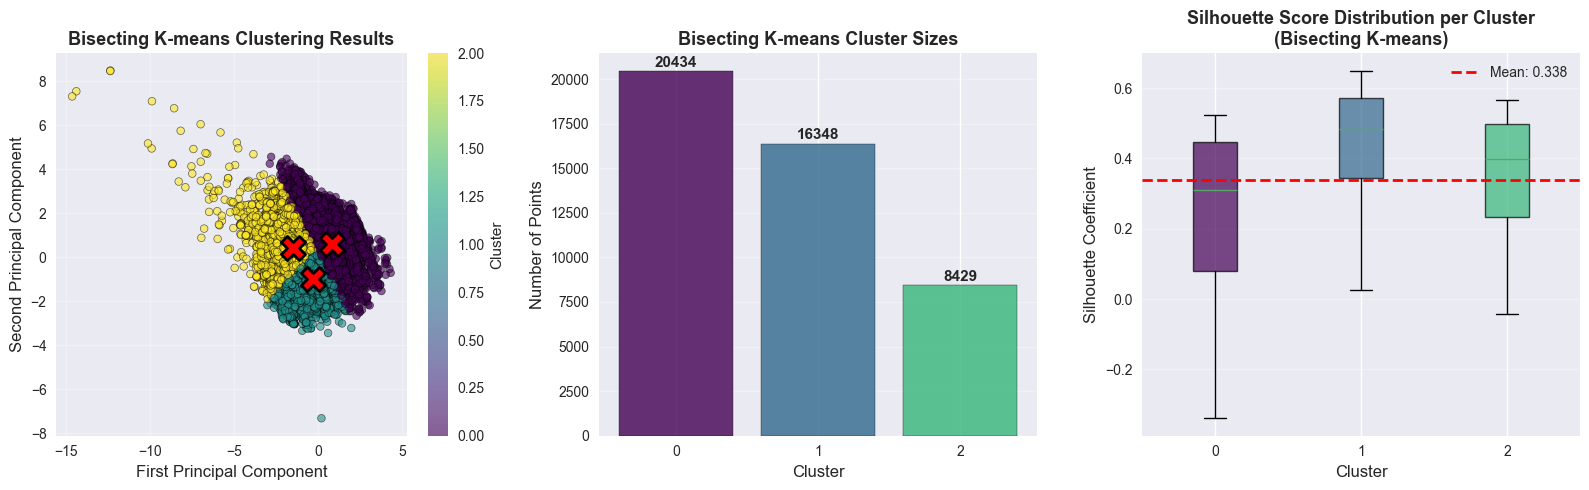

Number of Clusters: 3
Silhouette Score: 0.3379

Cluster Distribution:
  Cluster 0: 20434 points (45.2%)
  Cluster 1: 16348 points (36.2%)
  Cluster 2: 8429 points (18.6%)

Split Tree:
  Cluster 0 split into clusters 0 and 1
  Cluster 1 split into clusters 1 and 2

ALGORITHM COMPARISON
K-means Silhouette Score: 0.3867
Bisecting K-means Silhouette Score: 0.3379
Difference: 0.0488
K-means performed better for this dataset


In [29]:
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        from sklearn.cluster import KMeans
        
        n_samples = X.shape[0]
        # Start with all points in cluster 0
        self.labels_ = np.zeros(n_samples, dtype=int)
        next_label = 1  # Next available cluster label
        
        # Store centroid for initial cluster
        self.centers_[0] = X.mean(axis=0)
        
        # Keep splitting until we reach desired number of clusters
        while len(np.unique(self.labels_)) < self.n_clusters:
            # Find the largest cluster to split
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            largest_cluster = unique_labels[np.argmax(counts)]
            
            # Get points in the largest cluster
            cluster_mask = self.labels_ == largest_cluster
            cluster_points = X[cluster_mask]
            
            # Split this cluster into 2 using K-means
            kmeans_split = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            sub_labels = kmeans_split.fit_predict(cluster_points)
            
            # Update labels: keep first sub-cluster with original label,
            # assign second sub-cluster a new label
            cluster_indices = np.where(cluster_mask)[0]
            
            # Points in sub-cluster 0 keep the original label
            # Points in sub-cluster 1 get a new label
            new_label_mask = sub_labels == 1
            self.labels_[cluster_indices[new_label_mask]] = next_label
            
            # Store centroids for both child clusters
            self.centers_[largest_cluster] = kmeans_split.cluster_centers_[0]
            self.centers_[next_label] = kmeans_split.cluster_centers_[1]
            
            # Record the split in the tree
            self.split_tree[largest_cluster] = (largest_cluster, next_label)
            
            next_label += 1
        
        return self.labels_

# Apply Bisecting K-means
print("\n" + "="*60)
print("RECURSIVE BISECTING K-MEANS CLUSTERING")
print("="*60)

bisect = BisectingKMeans(n_clusters=3, random_state=42)
bisect_labels = bisect.fit_predict(X_pca)

# Visualize results
plt.figure(figsize=(16, 5))

# Plot 1: Bisecting K-means clusters
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=bisect_labels, 
                     cmap='viridis', alpha=0.6, s=30, edgecolors='k', linewidth=0.5)
# Plot centroids
for label, centroid in bisect.centers_.items():
    plt.scatter(centroid[0], centroid[1], c='red', marker='X', s=300, 
               edgecolors='black', linewidth=2, zorder=5)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('Bisecting K-means Clustering Results', fontsize=13, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)

# Plot 2: Cluster sizes comparison
plt.subplot(1, 3, 2)
unique_bisect, counts_bisect = np.unique(bisect_labels, return_counts=True)
bars = plt.bar(unique_bisect, counts_bisect, color=['#440154', '#31688e', '#35b779'], 
               alpha=0.8, edgecolor='black')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Points', fontsize=12)
plt.title('Bisecting K-means Cluster Sizes', fontsize=13, fontweight='bold')
plt.xticks(unique_bisect)
for bar, count in zip(bars, counts_bisect):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Plot 3: Silhouette analysis
plt.subplot(1, 3, 3)
from sklearn.metrics import silhouette_samples
silhouette_bisect_vals = silhouette_samples(X_pca, bisect_labels)
cluster_bisect_data = [silhouette_bisect_vals[bisect_labels == i] for i in unique_bisect]
bp = plt.boxplot(cluster_bisect_data, labels=unique_bisect, patch_artist=True)
for patch, color in zip(bp['boxes'], ['#440154', '#31688e', '#35b779']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Silhouette Coefficient', fontsize=12)
plt.title('Silhouette Score Distribution per Cluster\n(Bisecting K-means)', fontsize=13, fontweight='bold')
bisect_silhouette = silhouette_score(X_pca, bisect_labels)
plt.axhline(y=bisect_silhouette, color='r', linestyle='--', 
            linewidth=2, label=f'Mean: {bisect_silhouette:.3f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print evaluation metrics
print(f"Number of Clusters: {len(unique_bisect)}")
print(f"Silhouette Score: {bisect_silhouette:.4f}")
print("\nCluster Distribution:")
for i, count in enumerate(counts_bisect):
    print(f"  Cluster {unique_bisect[i]}: {count} points ({count/len(bisect_labels)*100:.1f}%)")
print("\nSplit Tree:")
for parent, children in bisect.split_tree.items():
    print(f"  Cluster {parent} split into clusters {children[0]} and {children[1]}")
print("="*60)

# Compare K-means and Bisecting K-means
print("\n" + "="*60)
print("ALGORITHM COMPARISON")
print("="*60)
print(f"K-means Silhouette Score: {silhouette:.4f}")
print(f"Bisecting K-means Silhouette Score: {bisect_silhouette:.4f}")
print(f"Difference: {abs(silhouette - bisect_silhouette):.4f}")
if silhouette > bisect_silhouette:
    print("K-means performed better for this dataset")
else:
    print("Bisecting K-means performed better for this dataset")
print("="*60)

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!